
<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge</h2>
</div>


<div class="panel-body">

<p>Using a simple 1D dataset as done above, can you determine whether the kernel is automatically normalized by default? How can you change this behavior? And how does this compare to SciPy's convolve function?</p>

</div>

</section>


In [1]:

import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

In [2]:
from astropy.convolution import Gaussian2DKernel
from astropy import units as u
from astropy.convolution import convolve, convolve_fft
import numpy as np
from scipy.ndimage import convolve as scipy_convolve
from astropy.io import fits

In [3]:
data = [1, 2, np.nan, 4, 5]
kernel = [0.5, 1.0, 0.5]

In [4]:
astrConvReg = convolve(data,kernel)
astrConvNormed = convolve(data,kernel,normalize_kernel=True)
astrConvNotNormed = convolve(data,kernel,normalize_kernel=False)
sciConv = scipy_convolve(data,kernel)
if astrConvReg.all() == astrConvNormed.all():
    print("Kernel is automatically normalized by default")
else:
    print("Kernel is not automatically normalized by default")
print(f"Astropy: {astrConvReg}")
print(f"SciPy: {sciConv}")
print(f"SciPy Convolve function does not have setting for normalization")

Kernel is automatically normalized by default
Astropy: [1.         1.66666667 3.         4.33333333 3.5       ]
SciPy: [2.5 nan nan nan 9.5]
SciPy Convolve function does not have setting for normalization



<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge</h2>
</div>


<div class="panel-body">

<ol>
<li>Reproject the GAIA source density map to the WCS of the IRAS map</li>
<li>Make a plot of the resulting image with WCSAxes</li>
<li>If you have FITS images available, try this out with your own data!</li>
</ol>

</div>

</section>


In [5]:
from astropy.io import fits
hdu_gaia = fits.open('../../../astropy_notebooks/data/LMCDensFits1k.fits')[0]
hdu_iras = fits.open('../../../astropy_notebooks/data/ISSA_100_LMC.fits')[0]
from astropy.wcs import WCS
wcs_gaia = WCS(hdu_gaia.header)
wcs_iras = WCS(hdu_iras.header)
from reproject import reproject_interp

In [6]:
gaia_reprojected, footprint = reproject_interp(hdu_gaia, hdu_iras.header)

<function matplotlib.pyplot.show(close=None, block=None)>

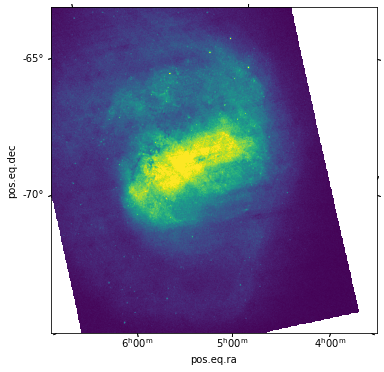

In [7]:
ax = plt.subplot(projection=wcs_iras)
plt.imshow(gaia_reprojected,vmax=100)
#ax.grid()
plt.show


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge</h2>
</div>


<div class="panel-body">

<ol>
<li>Take a look at the <a href="http://docs.astropy.org/en/stable/stats/index.html">astropy.stats documentation</a>, and in particular the long list of functions at the bottom, in case you see something that could be useful to you! (and feel free to try them if so)</li>
<li>If you had to find the median absolute deviation for a dataset, how would you do it? Try and find the robust standard deviation using the median absolute deviation for the sigma clipped array we produced before.</li>
</ol>

</div>

</section>


TypeError: 'module' object is not callable

In [8]:
import emoji
print(emoji.emojize("I have read the documentation. :cowboy_hat_face:"))
print(emoji.emojize("I messed around with the Jacknife testing as I needed to make my own jackknife test for PHYS 434"))
print(emoji.emojize("I messed around with the Jacknife testing as I needed to make my own jackknife test for PHYS 434"))

I have read the documentation. 🤠
I messed around with the Jacknife testing as I needed to make my own jackknife test for PHYS 434
I messed around with the Jacknife testing as I needed to make my own jackknife test for PHYS 434


In [9]:
from photutils.datasets import load_star_image
import numpy as np
from astropy.stats import sigma_clipped_stats
from astropy.visualization import hist
from astropy.stats import *

In [10]:
#data = np.hstack([np.random.normal(3, 1, 2000), np.random.normal(10, 0.5, 2000)])
star_image = load_star_image()
clipped_image = sigma_clip(star_image.data, sigma=2, maxiters=20)
data = clipped_image

In [11]:
estimate, bias, stderr, conf_interval =[],[],[],[]
for i in range(len(clipped_image)):
    woot = jackknife_stats(clipped_image[i],np.mean,confidence_level=0.95)
    estimate.append(woot[0])
    bias.append(woot[1])
    stderr.append(woot[2])
    conf_interval.append(woot[3])
    if i%5==0:
        print(i)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925
930
935
940
945
950
955
960
965
970
975
980
985
990
995
1000
1005
1010
1015
1020
1025
1030
1035
1040
1045
1050
1055


In [12]:
print(f"MAD: {median_absolute_deviation(data)}")
print(f"Robust STD: {mad_std(data)}")

MAD: 117.0
Robust STD: 173.46445956515544
